<a href="https://colab.research.google.com/github/arionpap4/msc_szakdolgozat/blob/main/dipterv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cloning a few open-source python project


In [ ]:
import os
import subprocess

projects = [
    "https://github.com/ansible/ansible.git",
    #havent cloned the following few
    "https://github.com/scrapy/scrapy.git",
    "https://github.com/apache/airflow.git",
    "https://github.com/getsentry/sentry.git",
    "https://github.com/odoo/odoo.git",
    "https://github.com/spyder-ide/spyder.git",
    "https://github.com/streamlit/streamlit.git",
    "https://github.com/quokkaproject/quokka.git",
    "https://github.com/wagtail/wagtail.git",
    "https://github.com/mopidy/mopidy.git"

]

target_folder = "/content/python_projects"
os.makedirs(target_folder, exist_ok=True)

# Projektek klónozása
for project in projects:
    project_name = project.split("/")[-1].replace(".git", "")
    project_path = os.path.join(target_folder, project_name)

    if not os.path.exists(project_path):
        subprocess.run(["git", "clone", project, project_path], check=True)
        print(f"Cloned: {project_name}")
    else:
        print(f"{project_name} already cloned, skipped.")

print("Cloning ended.")

print("\nCloned projects:")
for item in os.listdir(target_folder):
    print(item)


ansible already cloned, skipped.
Cloning ended.

Cloned projects:
own_project
.ipynb_checkpoints
ansible


but for now, i am using my own projects to test the execution

##Metrics


In [ ]:
!pip install Pylint
!pip install flake8
!pip install radon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
import subprocess
import re
import pandas as pd

def run_pylint_analysis(project_path):
    pylint_output = subprocess.run(['pylint', project_path, '--output-format=text'], capture_output=True, text=True, check=False)

    results_df = parse_pylint_output(pylint_output.stdout, project_path)

    # Create headers dynamically based on unique message types
    unique_types = sorted(results_df['Type'].unique())
    headers = ['Project', 'File', 'Score'] + unique_types

    # Pivot the DataFrame to create a table with message types as columns
    pivot_table = results_df.pivot_table(index=['Project', 'File', 'Score'],
                                         columns='Type',
                                         values='Count',
                                         fill_value=0).reset_index()

    # Reorder columns to match headers
    pivot_table = pivot_table[headers]

    return pivot_table

def parse_pylint_output(output, project_path):
    project_name = project_path.split('/')[-1]
    data = []
    score = 0.0

    for line in output.split('\n'):
        if project_name in line and ':' in line:
            parts = line.split(':')
            if len(parts) >= 4:
                file_path = parts[0].strip()
                file_name = file_path.split('/')[-1]
                message_type = parts[3].strip()
                data.append({'Project': project_name, 'File': file_name, 'Type': message_type, 'Count': 1})
        elif "Your code has been rated at" in line:
            score_match = re.search(r'rated at (\d+\.\d+)', line)
            if score_match:
                score = float(score_match.group(1))

    # Convert to DataFrame
    results_df = pd.DataFrame(data)

    # Add the score column to all rows
    results_df['Score'] = score

    # Group by Project, File, and Type to get the count of each message type
    results_df = results_df.groupby(['Project', 'File', 'Type', 'Score'])['Count'].sum().reset_index()

    return results_df

df = run_pylint_analysis('/content/python_projects/own_project')
display(df)

Type,Project,File,Score,C0103,C0114,C0116,C0121,C0301,C0303,C0304,...,W0611,W0612,W0613,W0622,W0702,W0718,W1203,W1309,W1514,W3101
0,own_project,extract_zips.py,4.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,own_project,get_logs.py,4.44,0.0,1.0,5.0,1.0,3.0,16.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
2,own_project,gsat_infos.py,4.44,6.0,1.0,11.0,4.0,38.0,70.0,0.0,...,0.0,8.0,1.0,0.0,13.0,1.0,0.0,0.0,3.0,0.0
3,own_project,read_data_from_logs.py,4.44,0.0,1.0,6.0,0.0,3.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,own_project,read_logs.py,4.44,28.0,1.0,0.0,3.0,10.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,own_project,read_logs_with_first_check_line.py,4.44,30.0,1.0,0.0,3.0,15.0,12.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0
6,own_project,read_perforce.py,4.44,0.0,1.0,1.0,0.0,6.0,18.0,1.0,...,1.0,3.0,0.0,2.0,1.0,3.0,8.0,0.0,1.0,2.0


Dropdown(description='Select File:', index=5, options=('extract_zips.py', 'get_logs.py', 'gsat_infos.py', 'rea…

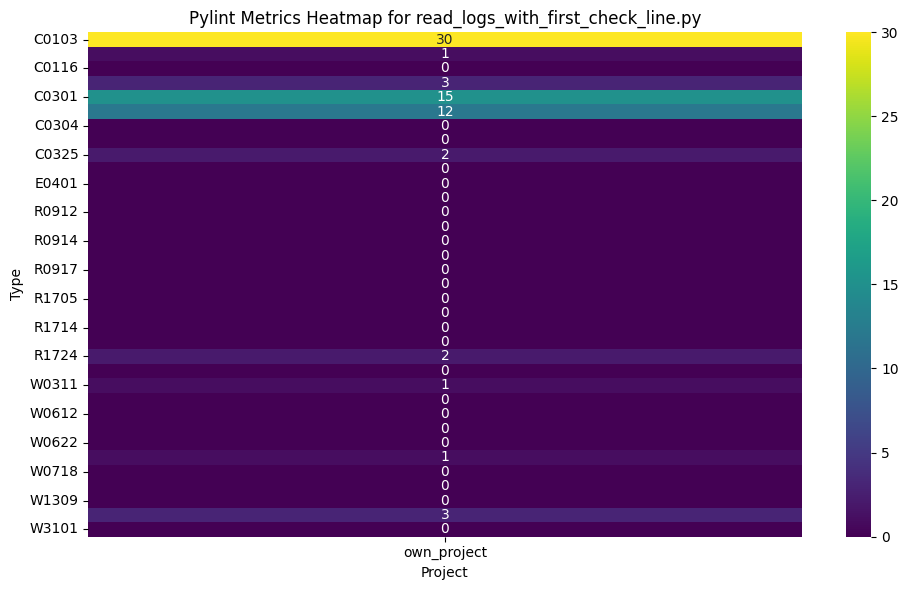

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import Dropdown
from IPython.display import display, clear_output


# Create a dropdown widget for file selection
files = df['File'].unique().tolist()
file_dropdown = Dropdown(options=files, description='Select File:')

def update_heatmap(change):

    clear_output(wait=True)
    display(file_dropdown)

    selected_file = change['new']
    file_df = df[df['File'] == selected_file]

    # Exclude 'File' and 'Score' columns from the heatmap
    heatmap_data = file_df.drop(columns=['File', 'Score'])

    # Transpose the data for better visualization
    heatmap_data = heatmap_data.set_index('Project').transpose()

    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='g')
    plt.title(f'Pylint Metrics Heatmap for {selected_file}')
    plt.tight_layout()
    plt.show()
    #plt.close()

file_dropdown.observe(update_heatmap, names='value')
display(file_dropdown)

# Initial heatmap display
update_heatmap({'new': file_dropdown.value})


In [ ]:
import subprocess

def run_static_analysis(project_path):
    pylint_output = subprocess.run(['pylint', project_path], capture_output=True, text=True)
    flake8_output = subprocess.run(['flake8', project_path], capture_output=True, text=True)

    print("Pylint eredmények:")
    print(pylint_output.stdout)
    print("\nFlake8 eredmények:")
    print(flake8_output.stdout)

run_static_analysis('/content/python_projects/own_project')


Pylint eredmények:
************* Module gsat_infos
python_projects/own_project/gsat_infos.py:18:0: W0311: Bad indentation. Found 8 spaces, expected 4 (bad-indentation)
python_projects/own_project/gsat_infos.py:19:0: W0311: Bad indentation. Found 12 spaces, expected 8 (bad-indentation)
python_projects/own_project/gsat_infos.py:20:0: W0311: Bad indentation. Found 12 spaces, expected 8 (bad-indentation)
python_projects/own_project/gsat_infos.py:21:0: W0311: Bad indentation. Found 12 spaces, expected 8 (bad-indentation)
python_projects/own_project/gsat_infos.py:22:0: W0311: Bad indentation. Found 12 spaces, expected 8 (bad-indentation)
python_projects/own_project/gsat_infos.py:23:0: W0311: Bad indentation. Found 12 spaces, expected 8 (bad-indentation)
python_projects/own_project/gsat_infos.py:25:0: W0311: Bad indentation. Found 12 spaces, expected 8 (bad-indentation)
python_projects/own_project/gsat_infos.py:26:50: C0303: Trailing whitespace (trailing-whitespace)
python_projects/own_projec

In [ ]:
import radon.complexity as cc
import os
from tabulate import tabulate

def analyze_code_metrics(project_path):
    project_name = os.path.basename(project_path)
    metrics_data = []

    for root, dirs, files in os.walk(project_path):
        for file in files:
            if file.endswith('.py'):
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    code = f.read()
                    results = cc.cc_visit(code)
                    for result in results:
                        metrics_data.append([project_name, result.name, result.complexity])

    # Create table using tabulate
    table = tabulate(metrics_data, headers=['Project Name', 'Function Name', 'Complexity'], tablefmt='grid')
    return table

table = analyze_code_metrics('/content/python_projects/own_project')


In [ ]:
print(table)

+----------------+-------------------------+--------------+
| Project Name   | Function Name           |   Complexity |
+================+=========================+==============+
| own_project    | extract_test_info       |            9 |
+----------------+-------------------------+--------------+
| own_project    | extract_testcheckpoints |           23 |
+----------------+-------------------------+--------------+
| own_project    | connect_to_perforce     |            4 |
+----------------+-------------------------+--------------+
| own_project    | check_date              |            6 |
+----------------+-------------------------+--------------+
| own_project    | count_testcases         |            1 |
+----------------+-------------------------+--------------+
| own_project    | get_subroutines         |           11 |
+----------------+-------------------------+--------------+
| own_project    | count_substeps          |           18 |
+----------------+----------------------

In [ ]:
import pkg_resources

def analyze_dependencies(project_path):
    requirements_path = os.path.join(project_path, 'requirements.txt')
    if os.path.exists(requirements_path):
        with open(requirements_path, 'r') as f:
            dependencies = pkg_resources.parse_requirements(f)
            print("Projekt függőségek:")
            for dep in dependencies:
                print(f"  {dep}")
    else:
        print("Nem található requirements.txt fájl")

analyze_dependencies('/content/python_projects/own_project')


Nem található requirements.txt fájl


<ipython-input-13-6500c7c4b65f>:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
